In [1]:
import numpy as np
import matplotlib.pyplot as plt

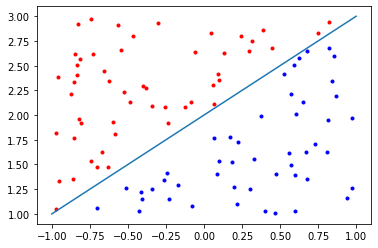

In [2]:
Slope = 1
Intercept = 2

NumberPoints = 100
NoiseVariance = 0.1

Xmin = -1
Xmax =  1

Ymin = Slope * Xmin + Intercept
Ymax = Slope * Xmax + Intercept

PointX = (Xmax-Xmin) * np.random.rand( NumberPoints , 1 ) + Xmin
PointY = (Ymax-Ymin) * np.random.rand( NumberPoints , 1 ) + Ymin

LineFunction = PointY - ( Slope * PointX + Intercept )
PointClass = np.sign( LineFunction )

for i in range( NumberPoints ):
    if PointClass[i]==1 :
        plt.plot( PointX[i] , PointY[i] , '.r' )
    else :
        plt.plot( PointX[i] , PointY[i] , '.b' )

plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.show()

Error =  40.0 Estimated Slope =  0.023166860080111373 Estimated Intercept 0.04
Error =  36.0 Estimated Slope =  0.04234179361904123 Estimated Intercept 0.07600000000000001
Error =  20.0 Estimated Slope =  0.04370243893597798 Estimated Intercept 0.09600000000000002
Error =  28.0 Estimated Slope =  0.05657323518580721 Estimated Intercept 0.12400000000000001
Error =  48.0 Estimated Slope =  0.07772102829346618 Estimated Intercept 0.17200000000000001
Error =  28.0 Estimated Slope =  0.09091502779869534 Estimated Intercept 0.2
Error =  40.0 Estimated Slope =  0.10267589811223124 Estimated Intercept 0.24000000000000002
Error =  44.0 Estimated Slope =  0.1124599631821361 Estimated Intercept 0.28400000000000003
Error =  36.0 Estimated Slope =  0.12435855577859908 Estimated Intercept 0.32000000000000006
Error =  32.0 Estimated Slope =  0.14183980363867843 Estimated Intercept 0.3520000000000001
Error =  52.0 Estimated Slope =  0.15724841208021445 Estimated Intercept 0.4040000000000001
Error =  3

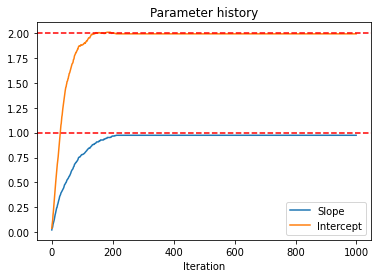

In [3]:
SlopeEstimate = 0
InterceptEstimate = 0

NumberIterations = 1000
LearningRate = 0.001
BatchSize = 20

SlopeHistory = []
InterceptHistory = []

for It in range( NumberIterations ):
    Index = np.random.permutation( len(PointX) )

    BatchPointX = PointX[ Index[1:BatchSize] ]
    BatchPointY = PointY[ Index[1:BatchSize] ]

    BatchPointClass = PointClass[ Index[1:BatchSize] ]
    
    LineFunctionEstimate = BatchPointY - ( SlopeEstimate * BatchPointX + InterceptEstimate )
    PointClassEstimate = np.sign( LineFunctionEstimate )

    Error = np.sum( ( BatchPointClass - PointClassEstimate )**2 )
    dError_dSlope = np.sum( 2 * ( BatchPointClass - PointClassEstimate ) * BatchPointX )
    dError_dIntercept = np.sum( 2 * ( BatchPointClass - PointClassEstimate ) )

    SlopeEstimate = SlopeEstimate - LearningRate * dError_dSlope
    InterceptEstimate = InterceptEstimate - LearningRate * dError_dIntercept

    SlopeHistory = np.append( SlopeHistory , SlopeEstimate )
    InterceptHistory = np.append( InterceptHistory , InterceptEstimate )

    print("Error = ",Error, "Estimated Slope = ",SlopeEstimate, "Estimated Intercept",InterceptEstimate) 

plt.plot( SlopeHistory )
plt.plot( InterceptHistory )
plt.title( 'Parameter history' )
plt.xlabel( 'Iteration' )
plt.legend( ['Slope' , 'Intercept'] )
plt.axhline( y=Slope , color='r' , linestyle='--' )
plt.axhline( y=Intercept , color='r' , linestyle='--' )
plt.show()

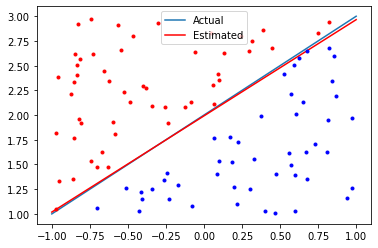

In [4]:
LineFunctionEstimate = PointY - ( SlopeEstimate * PointX + InterceptEstimate )
PointClassEstimate = np.sign( LineFunctionEstimate )

YminEstimate = SlopeEstimate * Xmin + InterceptEstimate
YmaxEstimate = SlopeEstimate * Xmax + InterceptEstimate

plt.plot( [Xmin,Xmax] , [Ymin,Ymax] )
plt.plot( [Xmin,Xmax] , [YminEstimate,YmaxEstimate] , 'r' )
plt.legend( ["Actual","Estimated"])

for i in range( NumberPoints ):
    if PointClassEstimate[i]==1 :
        plt.plot( PointX[i] , PointY[i] , '.r' )
    else :
        plt.plot( PointX[i] , PointY[i] , '.b' )

plt.show()